# **HYPOTHESIS TESTING**

We are making a statement that 

$$ \mu = [\mu'_x \pm Z_{score}\frac{\sigma}{\sqrt{n}} ]$$

To prove this statement whether its correct or not, we use **Hypothesis Testing**.

$$Null Hypothesis⇒ H_0$$
$$Alternative Hypothesis:-->H_1$$



**NOTE:** Always $H_0$ and $H_1$ are opposite

Let's take an example to understand it depth
$$H_0⇒  person \enspace is \enspace innoncent $$
$$H_1⇒  person \enspace is \enspace not \enspace innoncent $$



**CASE-1**: ***Reject*** Null Hypothesis $H_0$. So we are $Accepting \enspace Alternative \enspace Hypothesis \enspace H_0$

**CASE-1**: ***Fail to Reject*** Null Hypothesis $H_0$. So we are $Accepting \enspace Null \enspace Hypothesis \enspace H_1$



**Note:** We will never say accept $H_0$ or $H_1$. We we will say reject $H_0$ or Fail to reject $H_0$. Everything depends on $H_0$

Basically $$H_0⇒  Status  \enspace Quo \enspace (or) \enspace Ground \enspace Truth $$
$$H_1⇒  Bold  \enspace Claim$$

**NOTE:** Only these symbols are allowed  for corresponding $H_0$ and $H_1$.

 $$H_0: \enspace  =,\leq,\ge $$
 $$H_1: \enspace \neq ,<,> $$

# **PROCEDURE**

## Step-1:

**Null Hypothesis**
 $$H_0: \enspace  =,\leq,\ge $$
 **Alternative Hypothesis**
 $$H_1: \enspace \neq ,<,> $$

## Step-2:


*   Take a sample of data having size n
*   Now Compute  mean from this sample which is denoted by  $ \bar{x} $

## Step-3:

Calculate Z-Score or t-score.


**If $\sigma$ is given** we will calculate **Z-Score**
$$ z = \frac{\bar{x} - \mu_{\bar{x}}}{\sigma/\sqrt{n}} $$

where $\sigma$ population Standard deviation  


**If $\sigma$ is not given** we will calculate **T-Score**

$$t = \frac{\bar{x}-\mu_{\bar{x}}}{s/\sqrt{n}}$$

Where s is sample Standard Deviation and it is given by 

$$ s = \sqrt\frac{\sum({x-\bar{x})^{2}}}{n-1}$$


## Step-4:

Decide significance level $ \alpha $

* If $\alpha$ is very less, then more and more proof to reject null hypothesis $H_0$

* In medical $\alpha$ is very less and confidence level is very high



**Case-1:** perform **Right Tail Test** if 

$$H_0⇒  \enspace \mu \leq \bar{x}$$
$$H_1⇒  \enspace \mu > \bar{x}$$

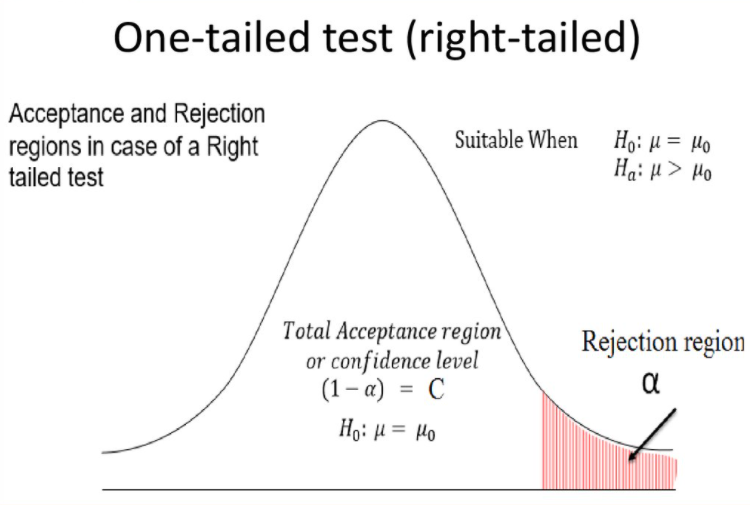

**Case-2:** perform **Left Tail Test** if 

$$H_0⇒  \enspace \mu \ge \bar{x}$$
$$H_1⇒  \enspace \mu < \bar{x}$$

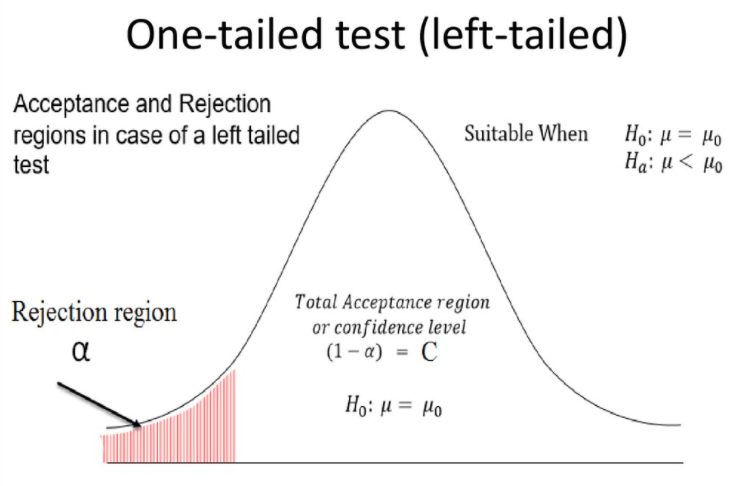


**Case-3:** perform **Two Tail Test** if 

$$H_0⇒  \enspace \mu = \bar{x}$$
$$H_1⇒  \enspace \mu \neq \bar{x}$$

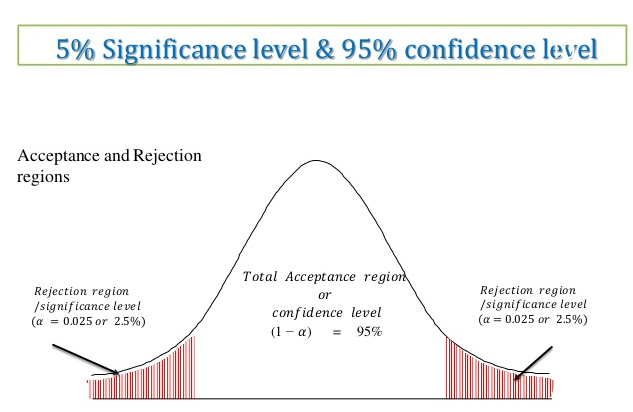

Now let's look into some Problems

# Standard Deviation

In [111]:
def standarddeviation(sample):
  mean=sum(sample)/len(sample)
  summ=0
  for k in sample:
    summ=summ+((k-mean)**2)
  k=(summ/(len(sample)-1))**0.5
  return k


# T-Score

In [112]:
def tscore(sample,u):
  x=(sum(sample))/(len(sample))
  t=standarddeviation(sample)
  t=(x-u)/t
  return (t*((len(sample))**0.5))


# Importing Necessary Libraries

In [113]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t as st
import matplotlib.pyplot as plt


# Question-1:

Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

**Step-1:**

Null Hypothesis (Status Quo or Ground Truth):
$$H0⇒μ=500$$

Alternate Hypothesis (Bold Claim):
$$H_1⇒ μ≠500 $$


**Step-2:**

Collect a sample having size of 10 (i.e n=10)

$$[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]$$
Compute sample mean ($\bar{x}$)



In [114]:
sample=[490,220,470,500,495,496,496,498,508,480]
#print(np.mean(sample))
print(sum(sample)/len(sample))

465.3


$$\bar{x} = 465.3 $$

**Step-3:**
Calculate T-Score which is given by

$$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

where,

$$ \sigma =  \sqrt\frac{\sum_{i=1}^{n}\,(x_i-\bar{x})^2}{n-1} $$  

In [115]:
print(standarddeviation(sample))


86.84859110991827


**Sample Standard Deviation:**
$$\sigma=86.85$$

In [116]:
t_score=tscore(sample,500)
print(t_score)

-1.2634751284446715


**T-Score:**

$$T_{Score}=-1.263$$

**Step-4:** Decide significance level

COnsider 95% confidence level

In [117]:
alpha=1-0.95
t_critical=st.ppf(1-alpha/2,df=9)
print(t_critical)

2.2621571627409915


**T-Critical:**
$$T_{Critical}=2.26$$

**Step-5:** Two Tail Test

In [118]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 86.84859110991827

# New Section

Text(465.3, 0.0007, 'x')

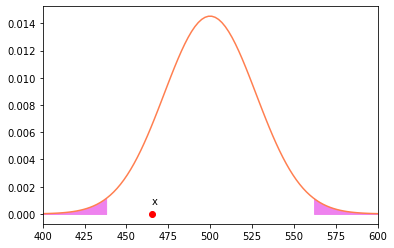

In [119]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = 500
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y,color='coral')


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='violet')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='violet')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0,color='red')
plt.annotate("x", (sample_mean, 0.0007))


In [120]:
if (t_score<0):
  t_score=-t_score
if ( t_score > t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Compute p-value:**


For two tailed test:
$$P_{Value} =2∗(1.0−cdf(test statistic))$$

Now,

$$ if \enspace (P_{Value} <\alpha) ⇒ Accept \enspace H_1$$

In [121]:
pvalue=2*(1-norm.cdf(np.abs(t_score)))
print("p_value:",pvalue)
print()
if(pvalue < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value: 0.20641847943818092

Fail to reject Null Hypothesis


# Question-2

You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

**Step-1:**

Null Hypothesis (Status Quo or Ground Truth):
$$H0⇒μ \leq 4$$

Alternate Hypothesis (Bold Claim):
$$H_1⇒ μ>4 $$


**Step-2:**

Collect a sample having size of 20 (i.e n=20)

$$[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,3,4,5,2]$$
Compute sample mean ($\bar{x}$)



In [122]:
sample=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,3,4,5,2]
#print(np.mean(sample))
print(sum(sample)/len(sample))

4.05


$$\bar{x} = 4.05 $$

**Step-3:**
Calculate T-Score which is given by

$$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

where,

$$ \sigma =  \sqrt\frac{\sum_{i=1}^{n}\,(x_i-\bar{x})^2}{n-1} $$  

In [123]:
print(standarddeviation(sample))


0.9986833437344549


**Sample Standard Deviation:**
$$\sigma=0.998$$

In [124]:
t_score=tscore(sample,4)
print(t_score)

0.22390159919342179


**T-Score:**

$$T_{Score}=0.224$$

**Step-4:** Decide significance level

COnsider 95% confidence level

In [125]:
alpha=1-0.95
t_critical_2=st.ppf(1-alpha/2,df=19)
print(t_critical_2)

2.093024054408263


**T-Critical:**
$$T_{Critical}=2.26$$

**Step-5:** Two Tail Test

In [126]:
sample_size_2=20
sample_mean_2=4.05
pop_mean_2=4
sample_std_2=0.9986833437344549

Text(4.05, 0.1, 'x_bar')

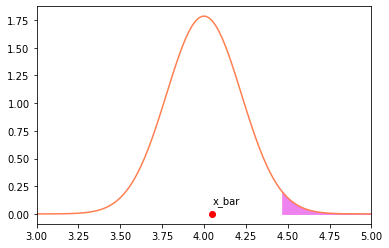

In [127]:

x_min_2=3
x_max_2=5

#Defining the sampling distribution mean and sampling distribution std
mean_2=pop_mean_2
std_2=sample_std_2/(sample_size_2**0.5)

#Plotting the graph and setting the x limits
x_2=np.linspace(x_min_2,x_max_2,100)
y_2=norm.pdf(x_2,mean_2,std_2)
plt.xlim(x_min_2,x_max_2)
plt.plot(x_2,y_2,color='coral')

#Computing the critical right value(Right tailed test)
t_critical_right_2=pop_mean_2+(t_critical_2*std_2)

#Shading the right rejection region
x2=np.linspace(t_critical_right_2,x_max_2,100)
y2=norm.pdf(x2,mean_2,std_2)
plt.fill_between(x2,y2,color='violet')

#Plotting the sample mean and concuding the results
plt.scatter(sample_mean_2,0,color='red')
plt.annotate("x_bar",(sample_mean_2,0.1))

In [130]:
if ( t_score > t_critical_2):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


P test

In [136]:
p_value_2 = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value_2)
print()
if(p_value_2 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.4114169356718137

Fail to reject Null Hypothesis


# Question-3

TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

**Step-1:**

Null Hypothesis (Status Quo or Ground Truth):
$$H0⇒μ \leq 15$$

Alternate Hypothesis (Bold Claim):
$$H_1⇒ μ>15 $$


**Step-2:**

Collect a sample having size of 15 (i.e n=15)

$$[14.56,14.7,15.5,13.88,16.1,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,13.88]$$
Compute sample mean ($\bar{x}$)



In [137]:
sample=[14.56,14.7,15.5,13.88,16.1,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,13.88]
#print(np.mean(sample))
print(sum(sample)/len(sample))

15.166666666666664


$$\bar{x} = 15.17 $$

**Step-3:**
Calculate T-Score which is given by

$$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

where,

$$ \sigma =  \sqrt\frac{\sum_{i=1}^{n}\,(x_i-\bar{x})^2}{n-1} $$  

In [138]:
print(standarddeviation(sample))


1.0654956369600732


In [139]:
t_score=tscore(sample,15)
print(t_score)

0.6058187401025295


**T-Score:**

$$T_{Score}=0.605$$

**Step-4:** Decide significance level

COnsider 95% confidence level

In [146]:
alpha=1-0.95
t_critical_3=st.ppf(1-alpha/2,df=19)
print(t_critical_3)

2.093024054408263


**T-Critical:**
$$T_{Critical}=2.09$$

In [144]:
sample_size_3=15
sample_mean_3=15.166666666666664
pop_mean_3=15
sample_std_3=1.0654956369600732

Text(15.166666666666664, 0.1, 'x_bar')

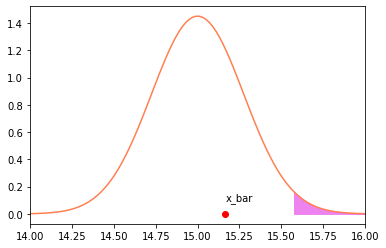

In [149]:
x_min_3=14
x_max_3=16

mean_3=pop_mean_3
std_3=sample_std_3/(sample_size_3**0.5)

x_3=np.linspace(x_min_3,x_max_3,100)
y_3=norm.pdf(x_3,mean_3,std_3)

plt.xlim(x_min_3,x_max_3)
plt.plot(x_3,y_3,color='coral')

t_critical_right_3=pop_mean_3+(t_critical_3*std_3)

x3=np.linspace(t_critical_right_3,x_max_3,100)
y3=norm.pdf(x3,mean_3,std_3)
plt.fill_between(x3,y3,color='violet')

plt.scatter(sample_mean_3,0,color='red')
plt.annotate("x_bar",(sample_mean_3,0.1))

In [151]:
if (t_score> t_critical_3):
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


In [153]:
p_value_3=1-norm.cdf(np.abs(t_score))
print("p_value:",p_value_3)
print()
if(p_value_3 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value: 0.2723175620365691

Fail to reject Null Hypothesis


# Question-4

You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim

**Step-1:**

Null Hypothesis (Status Quo or Ground Truth):
$$H0⇒μ \ge 100$$

Alternate Hypothesis (Bold Claim):
$$H_1⇒ μ<100 $$


**Step-2:**

Collect a sample having size of 15 (i.e n=15)

$$[97.8,99,98,92,92.97,89,98.12,92.99,95,96,96.98,99.012,98.4,96.43,95.54]$$
Compute sample mean ($\bar{x}$)



In [154]:
sample=[97.8,99,98,92,92.97,89,98.12,92.99,95,96,96.98,99.012,98.4,96.43,95.54]
#print(np.mean(sample))
print(sum(sample)/len(sample))

95.81613333333333


$$\bar{x} = 95.816 $$

**Step-3:**
Calculate T-Score which is given by

$$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} $$

where,

$$ \sigma =  \sqrt\frac{\sum_{i=1}^{n}\,(x_i-\bar{x})^2}{n-1} $$  

In [155]:
print(standarddeviation(sample))


2.9357079911877846


**Sample Standard Deviation:**
$$\sigma=2.93$$

In [156]:
t_score=tscore(sample,100)
print(t_score)

-5.519638183154662


**T-Score:**

$$T_{Score}=-5.52$$

**Step-4:** Decide significance level

COnsider 96% confidence level

In [160]:
alpha=1-0.96
t_critical_4=st.ppf(1-alpha/2,df=19)
print(t_critical_4)

2.2047013507414865


**T-Critical:**
$$T_{Critical}=2.09$$

In [163]:
sample_size_4=15
sample_mean_4=95.81613333333333
pop_mean_4=100
sample_std_4=2.9357079911877846

Text(95.81613333333333, 0.02, 'x_bar')

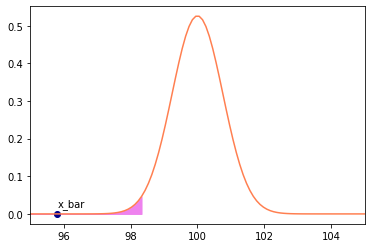

In [169]:
x_min_4=95
x_max_4=105

mean_4=pop_mean_4
std_4=sample_std_4/(sample_size_4**0.5)

x4=np.linspace(x_min_4,x_max_4,100)
y4=norm.pdf(x4,mean_4,std_4)

plt.xlim(x_min_4,x_max_4)
plt.plot(x4,y4,color='coral')

t_critical_left_4=pop_mean_4+(-t_critical_4*std_4)

x4=np.linspace(x_min_4,t_critical_left_4,100)
y4=norm.pdf(x4,mean_4,std_4)
plt.fill_between(x4,y4,color='violet')

plt.scatter(sample_mean_4,0,color='darkblue')
plt.annotate("x_bar",(sample_mean_4,0.02))

In [170]:
if(t_score<t_critical_4):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject Null Hypothesis


P-Test

In [172]:
p_value_4=1-norm.cdf(np.abs(t_score))

print("p_value:",p_value_4)
print()
if(p_value_4<alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value: 1.698491880475217e-08

Reject Null Hypothesis
